**You can use Google but don't use ChatGPT and Gemini. You are here to learn. Follow the instructions given below and write the code in that cell only.**


**Dataset Link:** https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

In [ ]:
# Load the dataset using pandas
import pandas as pd
wine_df = pd.read_csv('WineQT.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


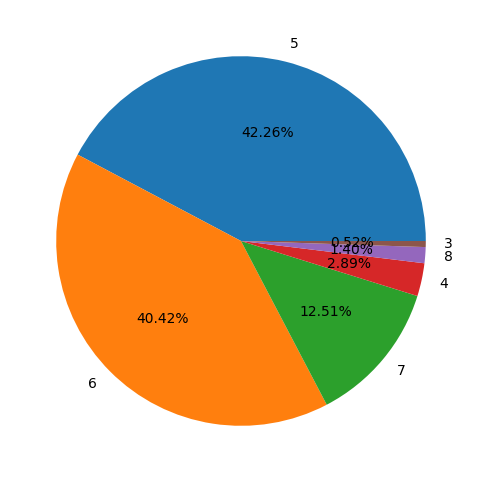

In [ ]:
# Plot the pie chart showing how much each quality exist in this dataset
# Your pie chart should have 6 parts with each part representing 1 quality number
# Print out the quality which has the highest percent
import matplotlib.pyplot as plt
quality = wine_df['quality'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(quality.values,labels=quality.index,autopct='%1.2f%%')
plt.show()

**From the above pie chart, we can observe that quality-5 has highest percentage i.e 42.26%**

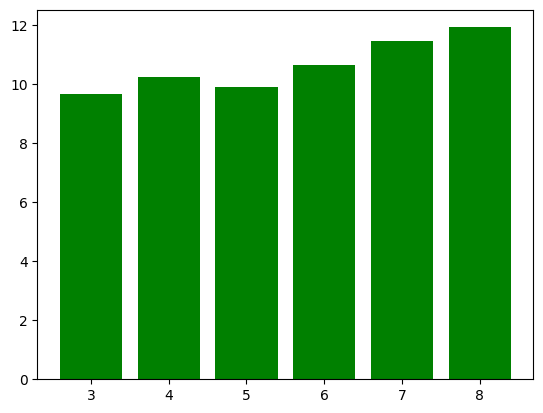

In [ ]:
# Plot a bar graph
# X axis: Quality of wine
# Y axis: Mean of total alcohol in that quality of wine
# Suppose quality 5 has 9.4, 9.8, 9.2 as entries in alcohol column then the value will be (9.4 + 9.8 + 9.2)/3
# Hint: use groupby() and mean() methods
avg_alcohol = wine_df.groupby('quality')['alcohol'].mean()
plt.bar(avg_alcohol.index,avg_alcohol.values,color='g')
plt.show()

In [ ]:
# Partition df into X and Y
# Y has only one column which is quality (target)
# X has all the other columns (features)
target ='quality'
X = wine_df.drop(columns=[target])
Y = wine_df[target]

In [ ]:
# Split into train and test datasets using test_size = 0.2 and random_state = 97

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=97)
print(X_train.shape)
print(X_test.shape)

(914, 12)
(229, 12)


In [ ]:
# Define a function which implements the Min-Max Scaler
# Your function should take a column of X_train as input and returns a list/np array/pd series which is scaled version of that column
def min_max(X_train,col):
  scaled = [(x-X_train[col].min())/(X_train[col].max()-X_train[col].min())  for x in X_train[col].tolist()]
  return scaled


In [ ]:
# Print out the min, max, mean value of the scaled column = 'volatile acidity'
# Print out the min, max, mean value of the scaled column = 'free sulfur dioxide'
# Which has higher min, max and mean value?

volatile_acid = min_max(X_train,'volatile acidity')
sulfur_dioxide = min_max(X_train,'free sulfur dioxide')
print('Minimum value of scaled volatile acidity:',min(volatile_acid))
print('Maximum value of scaled volatile acidity:',max(volatile_acid))
print('Mean value of scaled volatile acidity:',sum(volatile_acid)/len(volatile_acid))

print('-'*35)

print('Minimum value of free sulfur dioxide :',min(sulfur_dioxide))
print('Maximum value of free sulfur dioxide:',max(sulfur_dioxide))
print('Mean value of free sulfur dioxide:',sum(sulfur_dioxide)/len(sulfur_dioxide))

Minimum value of scaled volatile acidity: 0.0
Maximum value of scaled volatile acidity: 1.0
Mean value of scaled volatile acidity: 0.28197221306315756
-----------------------------------
Minimum value of free sulfur dioxide : 0.0
Maximum value of free sulfur dioxide: 1.0
Mean value of free sulfur dioxide: 0.21704660504915207


**Both the column have same minimum & maximum value. In case of mean, volatile acidity is higher than free sulfur dioxide.**

In [ ]:
# Perform normalization using sklearn
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

vol_acid = np.array(X_train['volatile acidity']).reshape(-1,1)
scaled_volatile_acid = scaler.fit_transform(vol_acid)
np.mean(scaled_volatile_acid)

0.28197221306315756

**Dataset Link:** https://drive.google.com/file/d/1M_djcbJS8LRZl2Vp5ulESjhzZHMJrNRE/view?usp=sharing

Use this dataset for the below questions, the first column is the target column whereas all the other columns are features.

In [ ]:
# Print out the correlation matrix of df

CLS_data = pd.read_csv('CLS_DATASET.csv',header=None)
CLS_data.corr()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
1,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
2,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
3,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
4,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
5,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
6,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
7,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
8,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
9,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [ ]:
# 6,7,12        high corr : (6,7) & (7,12)

In [ ]:
# Nothing to code in this cell, just read and understand

# Thumb Rule: If the magnitude of correlation between two features is high (close to 1) then both features are highly related to each other
# This means that one feature can be expressed in the form of other.
# In simple words feature_2 = some_function(feature_1)
# So it is advisable to drop one of the features and consider only one of them for training the machine learning model


# Thumb Rule: If the magnitude of correlation between one feature and target is high (close to 1) then that features is highly related to the target
# We should consider this feature for training the model


# Thumb Rule: If two features are highly correlated with each other and each feature has a high correlation with the target as well
# Then we consider only 1 feature even though both have higher correlation with the target
# We generally consider the feature which has a higher correlation with the target

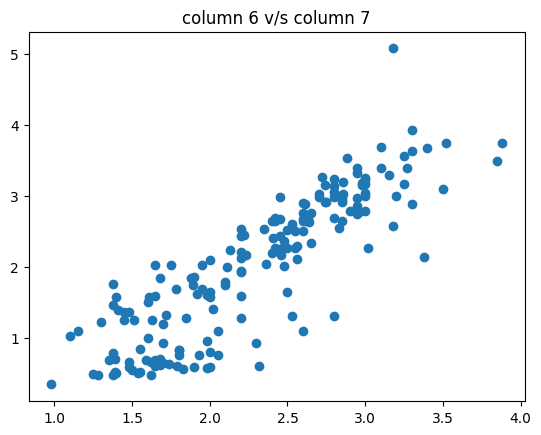

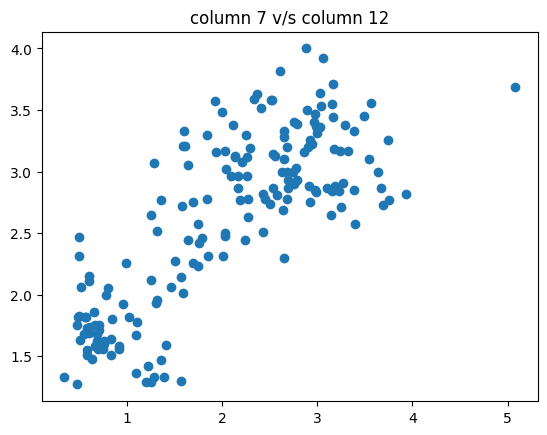

In [ ]:
# Can you name two columns which show the relation mentioned in rule 1
# The column names are just numbers
# Plot those two columns wrt each other. Do you see a relation? Use scatter plot
# Write in two lines what you observe.


plt.scatter(CLS_data[6],CLS_data[7])
plt.title('column 6 v/s column 7')
plt.show()
print()
plt.scatter(CLS_data[7],CLS_data[12])
plt.title('column 7 v/s column 12')
plt.show()

Both of the feature are positive correlated we can see one increases other also tend to increase. So, all the points are going in same direction.

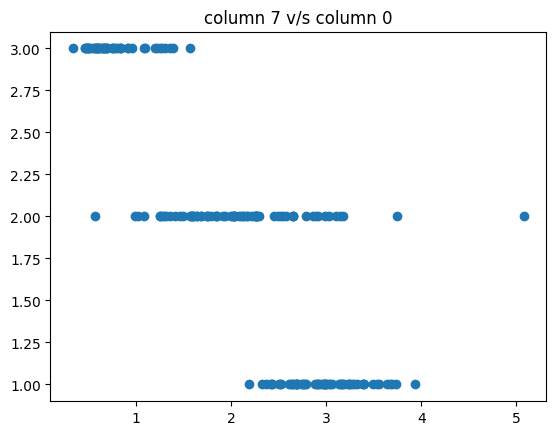

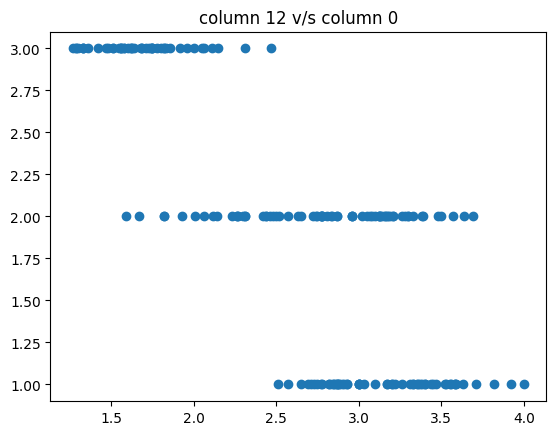

In [ ]:
# Can you name two columns which show the relation mentioned in rule 2
# Plot those two columns wrt each other. Do you see a relation? Use scatter plot
# Write in two lines what you observe.


plt.scatter(CLS_data[7],CLS_data[0])
plt.title('column 7 v/s column 0')
plt.show()

plt.scatter(CLS_data[12],CLS_data[0])
plt.title('column 12 v/s column 0')
plt.show()

**As one feature is negative correlated to other. Hence, one increases other tend to decrease.**

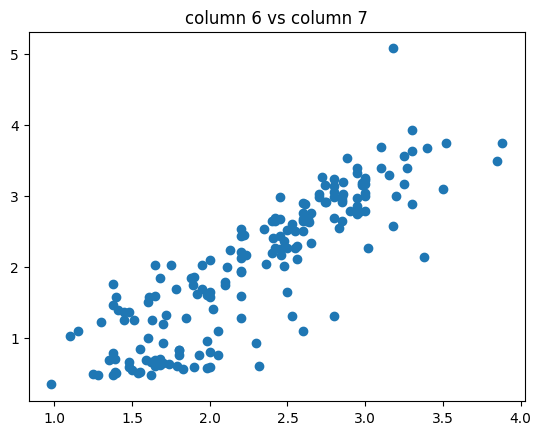

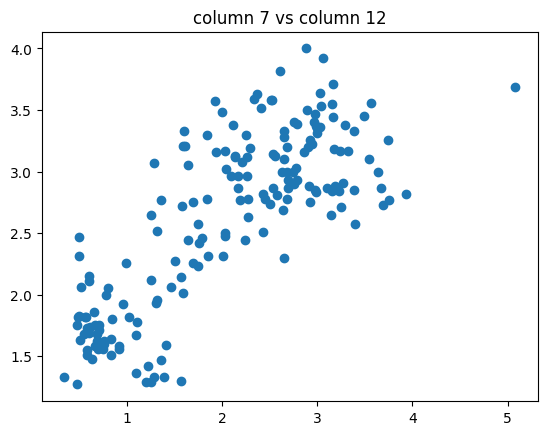

In [ ]:
# Can you name two columns which show the relation mentioned in rule 3
# Plot those two columns wrt each other. Do you see a relation? Use scatter plot
# Write in two lines what you observe.

plt.scatter(CLS_data[6],CLS_data[7])
plt.title('column 6 vs column 7')
plt.show()

plt.scatter(CLS_data[7],CLS_data[12])
plt.title('column 7 vs column 12')
plt.show()


**Assignment END<br>
Please submit on teams before the deadline**